# Day 4: K-Means Clustering – Mall Customer Segmentation

In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset
df = pd.read_csv('Mall Customer Segmentation.csv')

In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# Dataset Information
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Basic statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


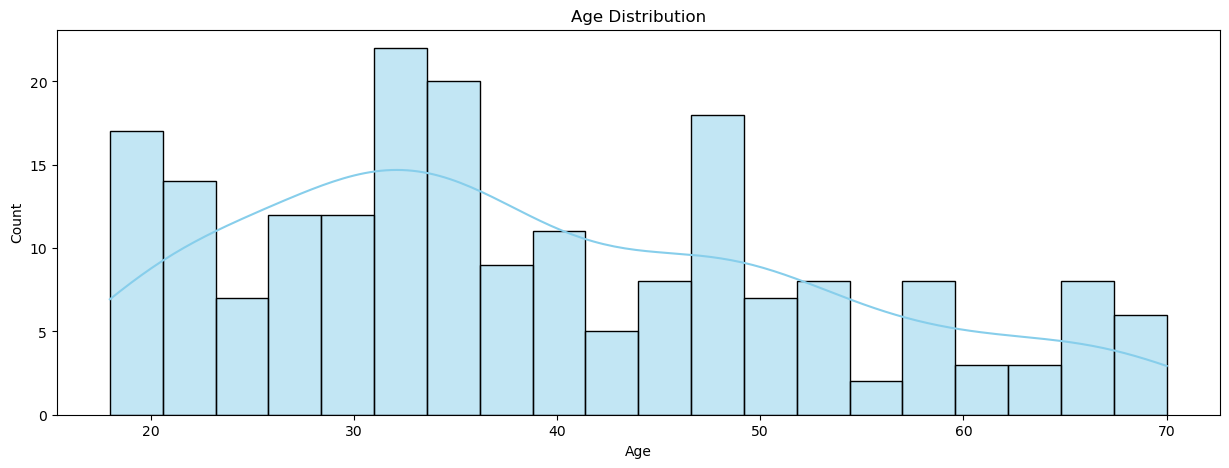

In [8]:
# Plot feature distributions
plt.figure(figsize=(15, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.show()


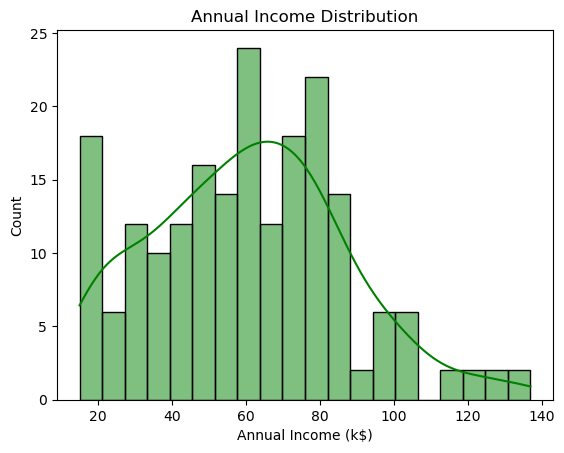

In [9]:
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='green')
plt.title('Annual Income Distribution')
plt.show()

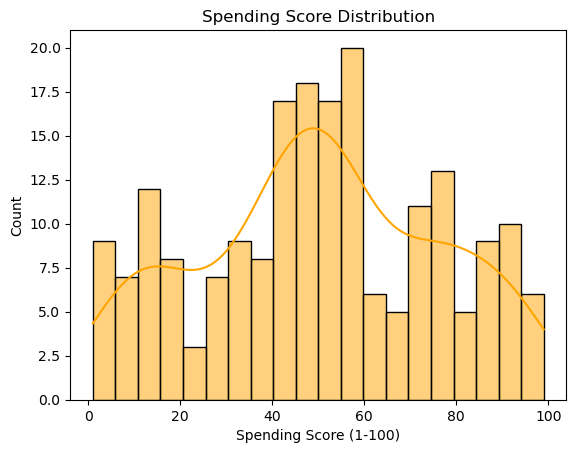

In [10]:
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='orange')
plt.title('Spending Score Distribution')
plt.show()


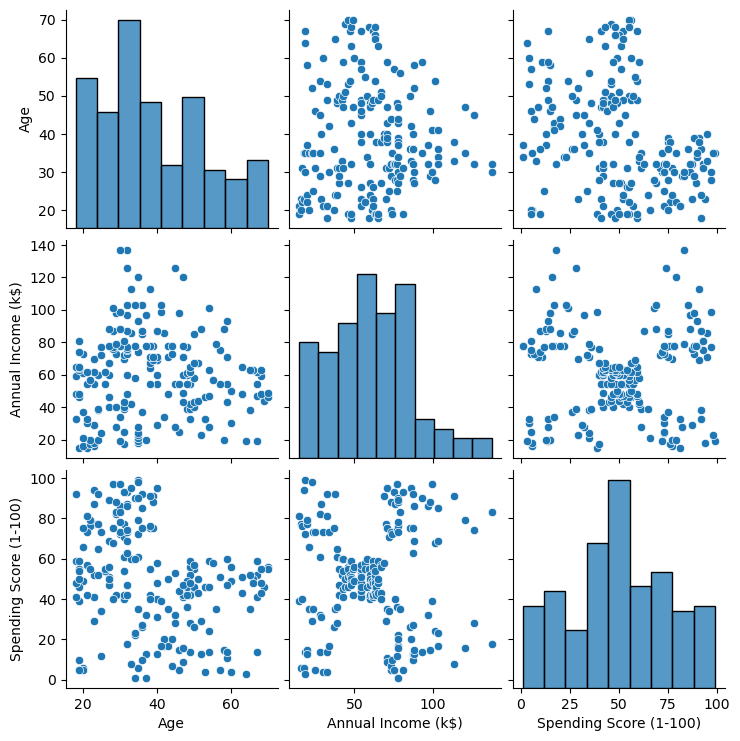

In [11]:
# Pair Plot for selected features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


In [12]:
# Drop unnecessary columns
df = df.drop('CustomerID', axis=1)


In [13]:
# Encode categorical variable (Gender)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [14]:
# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Finding Optimal Number of Clusters (Elbow Method)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


C:\Users\swaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\swaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\swaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\swaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Window

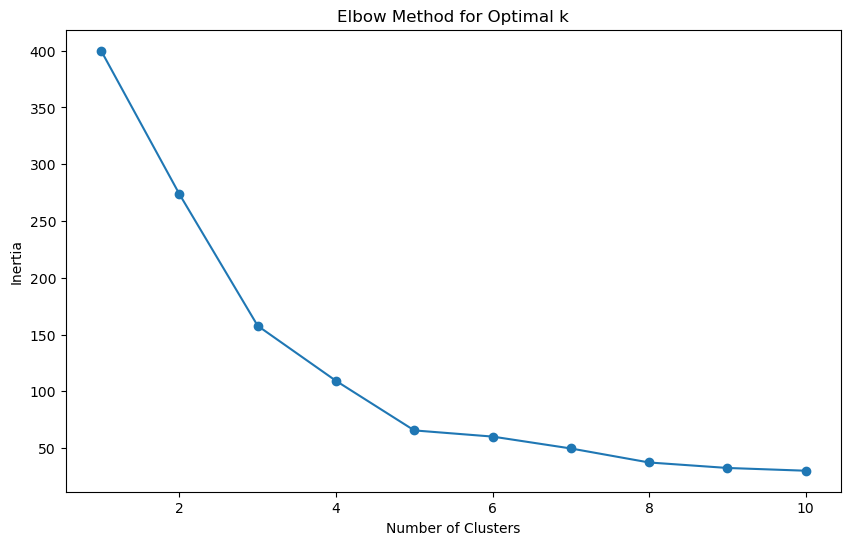

In [17]:
# Plot Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
optimal_k = 5

In [20]:
# Train K-Means Model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\swaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
# Display Cluster Centers
print("\nCluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


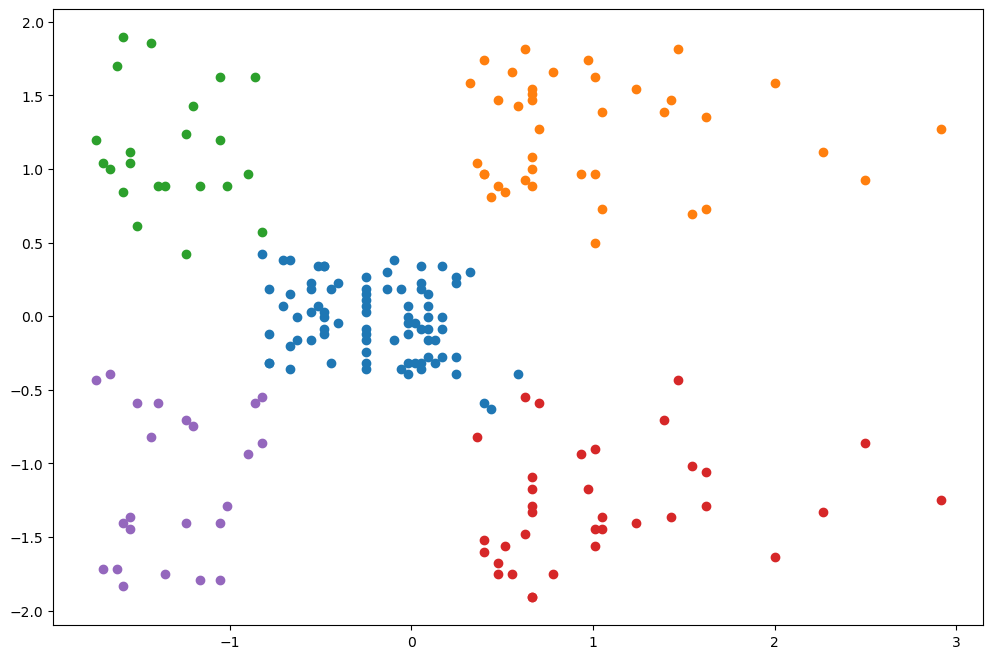

In [22]:
# Plot clusters
plt.figure(figsize=(12, 8))
for i in range(optimal_k):
    plt.scatter(
        X_scaled[df['Cluster'] == i, 0], 
        X_scaled[df['Cluster'] == i, 1], 
        label=f'Cluster {i}'
    )


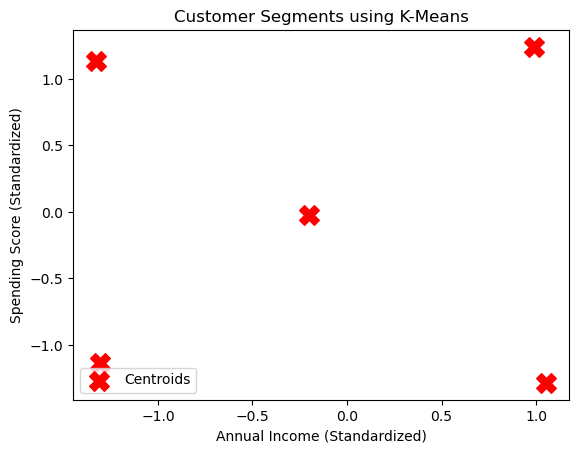

In [23]:
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=200, 
    c='red', 
    marker='X', 
    label='Centroids'
)
plt.title('Customer Segments using K-Means')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend()
plt.show()

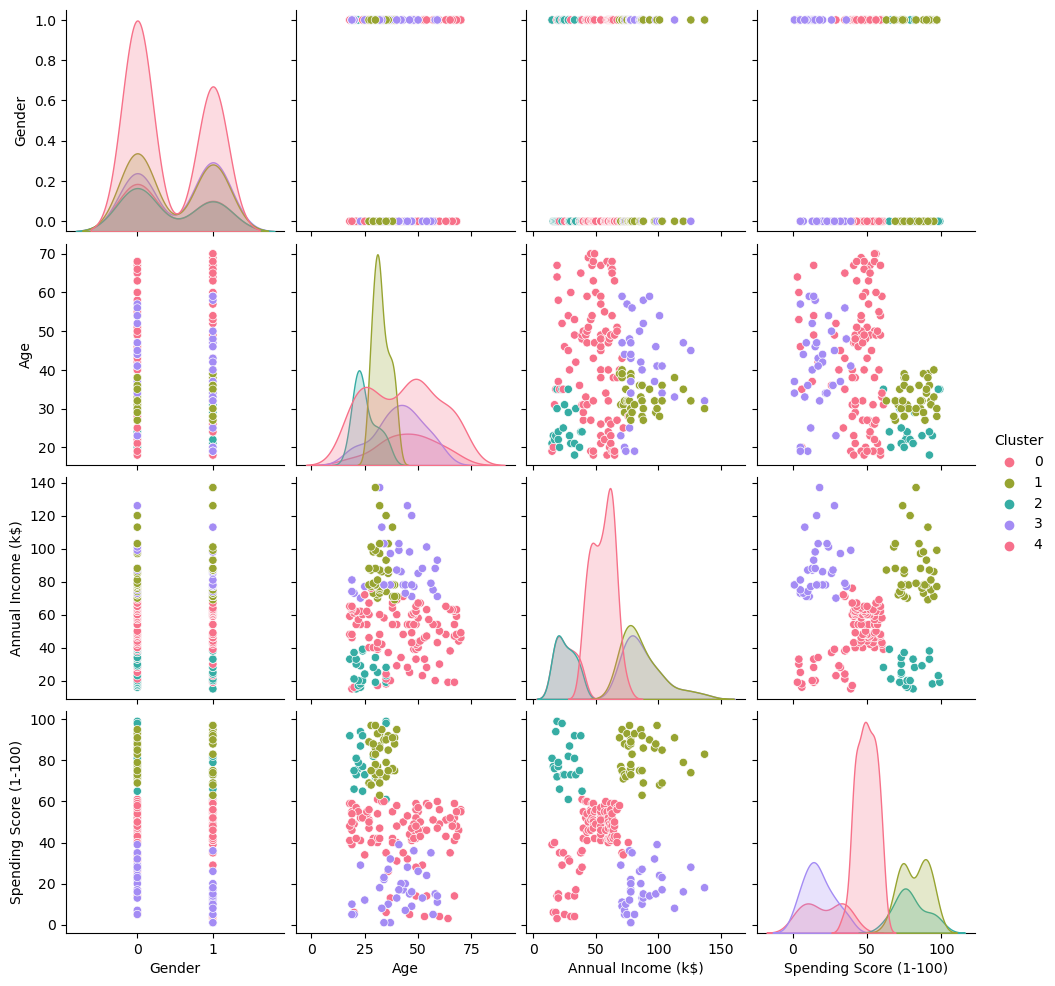

In [24]:

# Pair Plot to visualize clusters
sns.pairplot(df, hue='Cluster', palette='husl')
plt.show()


In [25]:
# Analyze each cluster
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)



Cluster Summary:
           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.407407  42.716049           55.296296               49.518519
1        0.461538  32.692308           86.538462               82.128205
2        0.409091  25.272727           25.727273               79.363636
3        0.542857  41.114286           88.200000               17.114286
4        0.391304  45.217391           26.304348               20.913043
